# Data Cleaning

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from IPython.display import display

In [ ]:
import matplotlib.pyplot as plt #for visual
import seaborn as sns #for colours

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
cols    = ['Gender','Age','Height','Weight','family_history_with_overweight','take_highcaloryfood','take_vege','num_of_main_meals','take_food_between_meals','smoking','water_consumption','monitor_calory','physical_activity_days','technology_usage','take_alcohol','transport_used','weight_type']
obesity = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv', names=cols)
print(obesity.shape)
obesity.head()
print(obesity)

(2112, 17)
      Gender        Age    Height      Weight  family_history_with_overweight  \
0     Gender        Age    Height      Weight  family_history_with_overweight   
1     Female         21      1.62          64                             yes   
2     Female         21      1.52          56                             yes   
3       Male         23       1.8          77                             yes   
4       Male         27       1.8          87                              no   
...      ...        ...       ...         ...                             ...   
2107  Female  20.976842   1.71073  131.408528                             yes   
2108  Female  21.982942  1.748584  133.742943                             yes   
2109  Female  22.524036  1.752206  133.689352                             yes   
2110  Female  24.361936   1.73945  133.346641                             yes   
2111  Female  23.664709  1.738836  133.472641                             yes   

     take_highca

## Step 01: Cleaning Missing Data

--> to remove row 0

In [ ]:
data = obesity.drop(0, axis=0) #to remove row 0
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,take_highcaloryfood,take_vege,num_of_main_meals,take_food_between_meals,smoking,water_consumption,monitor_calory,physical_activity_days,technology_usage,take_alcohol,transport_used,weight_type
1,Female,21,1.62,64,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
2,Female,21,1.52,56,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
3,Male,23,1.8,77,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
4,Male,27,1.8,87,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
5,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# Check for missing values in all attributes
missing_values = obesity.isnull().sum()

# Print the count of missing values for each attribute
print(missing_values)


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
take_highcaloryfood               0
take_vege                         0
num_of_main_meals                 0
take_food_between_meals           0
smoking                           0
water_consumption                 0
monitor_calory                    0
physical_activity_days            0
technology_usage                  0
take_alcohol                      0
transport_used                    0
weight_type                       0
dtype: int64


Comment : Since there is no missing values in all attributes, proceed to step 2 in data wrangling

## Step 02: Cleaning Duplicated Data

In [ ]:
# Convert column to numeric type
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['water_consumption'] = pd.to_numeric(data['water_consumption'], errors='coerce')
data['physical_activity_days'] = pd.to_numeric(data['physical_activity_days'], errors='coerce')
data['technology_usage'] = pd.to_numeric(data['technology_usage'], errors='coerce')
data['num_of_main_meals'] = pd.to_numeric(data['num_of_main_meals'], errors='coerce')
data['take_vege'] = pd.to_numeric(data['take_vege'], errors='coerce')

# Change to 2 decimal places
data["take_vege"] = data["take_vege"].astype(int)
data[["num_of_main_meals"]] = data[["num_of_main_meals"]].astype("int") #in integer
data[["Age"]] = data[["Age"]].astype("int") #in integer
data["Height"] = data["Height"].astype(float).round(2) #in meters
data["Weight"] = data["Weight"].astype(float).round(2) #in kilograms
data["water_consumption"] = data["water_consumption"].astype(float).round(2) #in litre
data["physical_activity_days"] = data["physical_activity_days"].astype("int") #in days
data["technology_usage"] = data["technology_usage"].astype(float).round(1) #in hours

print(data)
data

      Gender  Age  Height  Weight family_history_with_overweight  \
1     Female   21    1.62   64.00                            yes   
2     Female   21    1.52   56.00                            yes   
3       Male   23    1.80   77.00                            yes   
4       Male   27    1.80   87.00                             no   
5       Male   22    1.78   89.80                             no   
...      ...  ...     ...     ...                            ...   
2107  Female   20    1.71  131.41                            yes   
2108  Female   21    1.75  133.74                            yes   
2109  Female   22    1.75  133.69                            yes   
2110  Female   24    1.74  133.35                            yes   
2111  Female   23    1.74  133.47                            yes   

     take_highcaloryfood  take_vege  num_of_main_meals  \
1                     no          2                  3   
2                     no          3                  3   
3        

,Gender,Age,Height,Weight,family_history_with_overweight,take_highcaloryfood,take_vege,num_of_main_meals,take_food_between_meals,smoking,water_consumption,monitor_calory,physical_activity_days,technology_usage,take_alcohol,transport_used,weight_type
1,Female,21,1.62,64.00,yes,no,2,3,Sometimes,no,2.00,no,0,1.0,no,Public_Transportation,Normal_Weight
2,Female,21,1.52,56.00,yes,no,3,3,Sometimes,yes,3.00,yes,3,0.0,Sometimes,Public_Transportation,Normal_Weight
3,Male,23,1.80,77.00,yes,no,2,3,Sometimes,no,2.00,no,2,1.0,Frequently,Public_Transportation,Normal_Weight
4,Male,27,1.80,87.00,no,no,3,3,Sometimes,no,2.00,no,2,0.0,Frequently,Walking,Overweight_Level_I
5,Male,22,1.78,89.80,no,no,2,1,Sometimes,no,2.00,no,0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,Female,20,1.71,131.41,yes,yes,3,3,Sometimes,no,1.73,no,1,0.9,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,21,1.75,133.74,yes,yes,3,3,Sometimes,no,2.01,no,1,0.6,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,22,1.75,133.69,yes,yes,3,3,Sometimes,no,2.05,no,1,0.6,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,24,1.74,133.35,yes,yes,3,3,Sometimes,no,2.85,no,1,0.6,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
print(data)
print(data.duplicated())
print()
print(data.drop_duplicates())

      Gender  Age  Height  Weight family_history_with_overweight  \
1     Female   21    1.62   64.00                            yes   
2     Female   21    1.52   56.00                            yes   
3       Male   23    1.80   77.00                            yes   
4       Male   27    1.80   87.00                             no   
5       Male   22    1.78   89.80                             no   
...      ...  ...     ...     ...                            ...   
2107  Female   20    1.71  131.41                            yes   
2108  Female   21    1.75  133.74                            yes   
2109  Female   22    1.75  133.69                            yes   
2110  Female   24    1.74  133.35                            yes   
2111  Female   23    1.74  133.47                            yes   

     take_highcaloryfood  take_vege  num_of_main_meals  \
1                     no          2                  3   
2                     no          3                  3   
3        

In [ ]:
data.dtypes

Gender                             object
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight     object
take_highcaloryfood                object
take_vege                           int64
num_of_main_meals                   int64
take_food_between_meals            object
smoking                            object
water_consumption                 float64
monitor_calory                     object
physical_activity_days              int64
technology_usage                  float64
take_alcohol                       object
transport_used                     object
weight_type                        object
dtype: object

With all these steps, the data should now be clean and ready for further processing!


## Step 03: Data Normalization

Sometimes, you may want to normalize numeric data to reap its benefits during data modeling. Pandas does not have a normalize function, so you can either compute a normalization operation on the column itself, or you get Numpy's help to normalize values in the column.

first, go through each attributes and decide whether it should be normalize or not .

height , no

weight , yes

In [ ]:
data['Weight']

1        64.00
2        56.00
3        77.00
4        87.00
5        89.80
         ...  
2107    131.41
2108    133.74
2109    133.69
2110    133.35
2111    133.47
Name: Weight, Length: 2111, dtype: float64

In [ ]:
data['Weight']/data['Weight'].max()

1       0.369942
2       0.323699
3       0.445087
4       0.502890
5       0.519075
          ...   
2107    0.759595
2108    0.773064
2109    0.772775
2110    0.770809
2111    0.771503
Name: Weight, Length: 2111, dtype: float64

This gives us an idea of how far is the relative weight of each person

To directly replace the values in that column and weight columns:

In [ ]:
# make a deep copy - separate copy from the original data2 = data would not work, it's a shallow copy
data2 = data.copy()

In [ ]:
data2['Weight'] = data['Weight']/data['Weight'].max()
data2['Height'] = data['Height']/data['Height'].max()
data2['water_consumption'] = data['water_consumption']/data['water_consumption'].max()

In [ ]:
# check
data2[["Height","Weight" , "water_consumption"]]

,Height,Weight,water_consumption
1,0.818182,0.369942,0.666667
2,0.767677,0.323699,1.000000
3,0.909091,0.445087,0.666667
4,0.909091,0.502890,0.666667
5,0.898990,0.519075,0.666667
...,...,...,...
2107,0.863636,0.759595,0.576667
2108,0.883838,0.773064,0.670000
2109,0.883838,0.772775,0.683333
2110,0.878788,0.770809,0.950000


## Step 04: Data Transformation

In [ ]:
# Create a mapping dictionary for the conversion
vege_mapping = {1: 'never', 2: 'sometimes', 3: 'always'}

# Convert the 'take_vege' variable using the mapping dictionary
data2['take_vege'] = data2['take_vege'].map(vege_mapping)


In [ ]:
data2["technology_usage"].dtype

dtype('float64')

Text(0.5, 1.0, 'technology_usage bins')

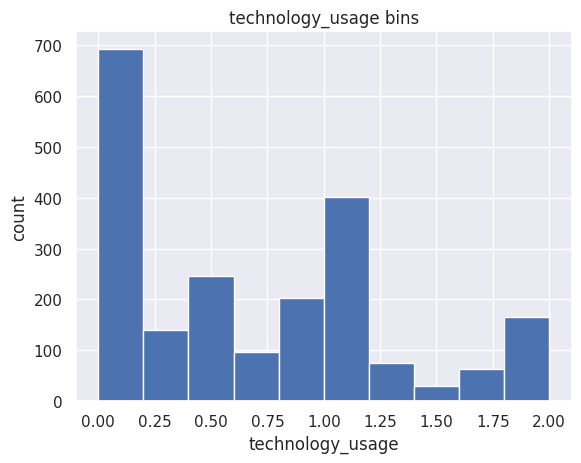

In [ ]:


%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(data2["technology_usage"])

# set x/y labels and plot title
plt.xlabel("technology_usage")
plt.ylabel("count")
plt.title("technology_usage bins")

In [ ]:
bins = np.linspace(min(data2["technology_usage"]), max(data2["technology_usage"]), 4)
print(bins)


[0.         0.66666667 1.33333333 2.        ]


In [ ]:
group_tech_names = ['Low', 'Moderate', 'High']

In [ ]:
data2['technology_usage-binned'] = pd.cut(data2['technology_usage'], bins, labels=group_tech_names, include_lowest=True )

In [ ]:
data2[['technology_usage', 'technology_usage-binned']].head(15)


,technology_usage,technology_usage-binned
1,1.0,Moderate
2,0.0,Low
3,1.0,Moderate
4,0.0,Low
5,0.0,Low
6,0.0,Low
7,0.0,Low
8,0.0,Low
9,1.0,Moderate
10,1.0,Moderate


In [ ]:
data2["technology_usage-binned"].value_counts()

Low         1079
Moderate     735
High         297
Name: technology_usage-binned, dtype: int64

Text(0.5, 1.0, 'technology_usage Bins')

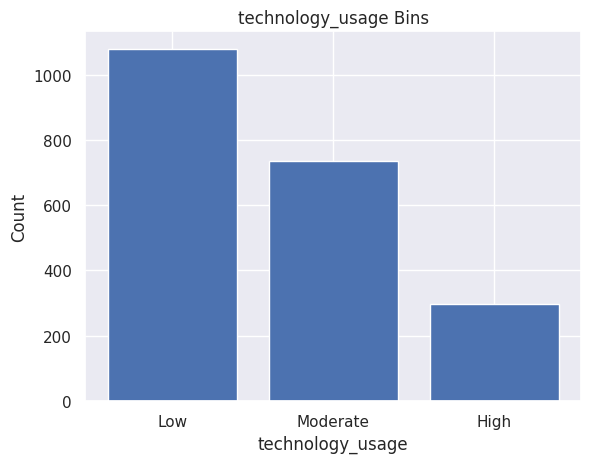

In [ ]:
plt.bar(group_tech_names, data2["technology_usage-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel('technology_usage')
plt.ylabel("Count")
plt.title("technology_usage Bins")

In [ ]:
data2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,take_highcaloryfood,take_vege,num_of_main_meals,take_food_between_meals,smoking,water_consumption,monitor_calory,physical_activity_days,technology_usage,take_alcohol,transport_used,weight_type,technology_usage-binned
1,Female,21,0.818182,0.369942,yes,no,sometimes,3,Sometimes,no,0.666667,no,0,1.0,no,Public_Transportation,Normal_Weight,Moderate
2,Female,21,0.767677,0.323699,yes,no,always,3,Sometimes,yes,1.000000,yes,3,0.0,Sometimes,Public_Transportation,Normal_Weight,Low
3,Male,23,0.909091,0.445087,yes,no,sometimes,3,Sometimes,no,0.666667,no,2,1.0,Frequently,Public_Transportation,Normal_Weight,Moderate
4,Male,27,0.909091,0.502890,no,no,always,3,Sometimes,no,0.666667,no,2,0.0,Frequently,Walking,Overweight_Level_I,Low
5,Male,22,0.898990,0.519075,no,no,sometimes,1,Sometimes,no,0.666667,no,0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,Low


In [ ]:
data2.dtypes

Gender                              object
Age                                  int64
Height                             float64
Weight                             float64
family_history_with_overweight      object
take_highcaloryfood                 object
take_vege                           object
num_of_main_meals                    int64
take_food_between_meals             object
smoking                             object
water_consumption                  float64
monitor_calory                      object
physical_activity_days               int64
technology_usage                   float64
take_alcohol                        object
transport_used                      object
weight_type                         object
technology_usage-binned           category
dtype: object

// Age


Text(0.5, 1.0, 'Age bins')

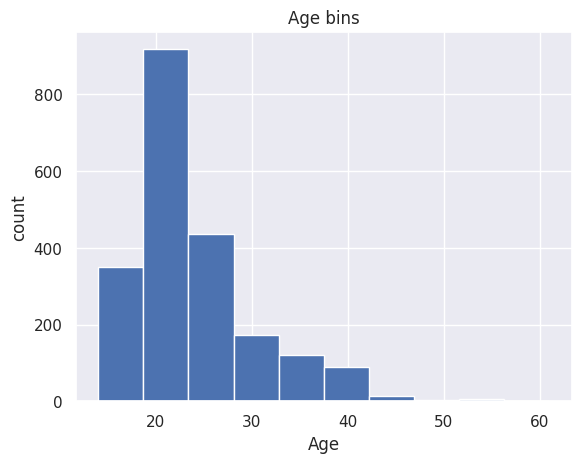

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(data2["Age"])

# set x/y labels and plot title
plt.xlabel("Age")
plt.ylabel("count")
plt.title("Age bins")

In [ ]:
#bins2 = np.linspace(min(data2["Age"]), max(data2["Age"]), 4)
#print(bins2)

bins2 = [0, 20, 30, 50, np.inf]
group_age_names = ['Below 20', '20-30', '30-50', 'Above 50']
print(bins2)


[0, 20, 30, 50, inf]


In [ ]:
data2['Age-binned'] = pd.cut(data2['Age'], bins2, labels=group_age_names, include_lowest=True )

In [ ]:
data2[['Age', 'Age-binned']].head(15)


,Age,Age-binned
1,21,20-30
2,21,20-30
3,23,20-30
4,27,20-30
5,22,20-30
6,29,20-30
7,23,20-30
8,22,20-30
9,24,20-30
10,22,20-30


In [ ]:
data2["Age-binned"].value_counts()

20-30       1138
Below 20     674
30-50        290
Above 50       9
Name: Age-binned, dtype: int64

Text(0.5, 1.0, 'Age Bins')

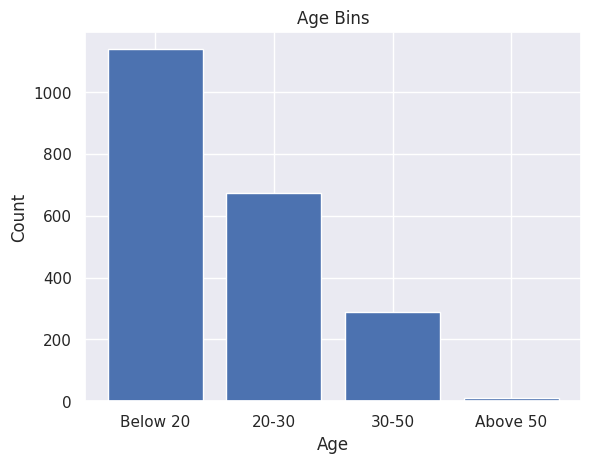

In [ ]:
plt.bar(group_age_names, data2["Age-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel('Age')
plt.ylabel("Count")
plt.title("Age Bins")

Text(0.5, 1.0, 'water_consumption bins')

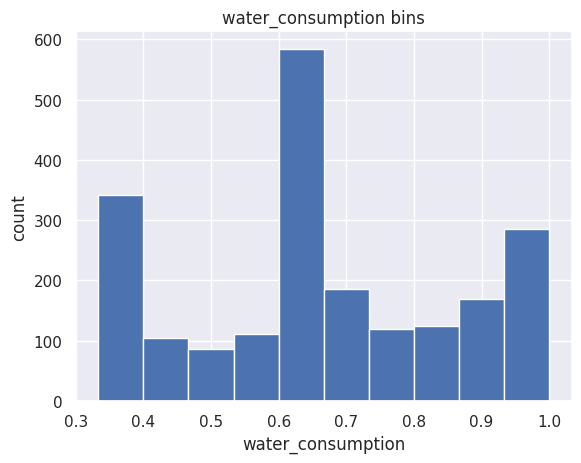

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(data2["water_consumption"])

# set x/y labels and plot title
plt.xlabel("water_consumption")
plt.ylabel("count")
plt.title("water_consumption bins")

In [ ]:
bins3 = np.linspace(min(data2["water_consumption"]), max(data2["water_consumption"]), 4)
print(bins3)


[0.33333333 0.55555556 0.77777778 1.        ]


In [ ]:
group_water_names = ['Low', 'Moderate', 'High']

In [ ]:
data2['water_consumption-binned'] = pd.cut(data2['water_consumption'], bins3, labels=group_water_names, include_lowest=True )

In [ ]:
data2[['water_consumption', 'water_consumption-binned']].head(15)


,water_consumption,water_consumption-binned
1,0.666667,Moderate
2,1.000000,High
3,0.666667,Moderate
4,0.666667,Moderate
5,0.666667,Moderate
6,0.666667,Moderate
7,0.666667,Moderate
8,0.666667,Moderate
9,0.666667,Moderate
10,0.666667,Moderate


In [ ]:
data2["water_consumption-binned"].value_counts()

Moderate    911
High        625
Low         575
Name: water_consumption-binned, dtype: int64

Text(0.5, 1.0, 'water_consumption Bins')

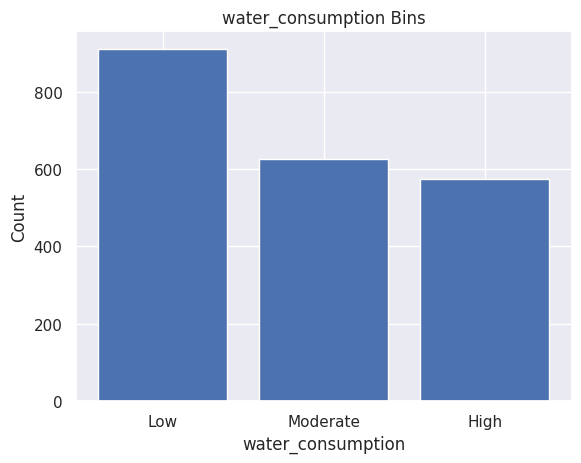

In [ ]:
plt.bar(group_water_names, data2["water_consumption-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel('water_consumption')
plt.ylabel("Count")
plt.title("water_consumption Bins")

In [ ]:
data2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,take_highcaloryfood,take_vege,num_of_main_meals,take_food_between_meals,smoking,water_consumption,monitor_calory,physical_activity_days,technology_usage,take_alcohol,transport_used,weight_type,technology_usage-binned,Age-binned,water_consumption-binned
1,Female,21,0.818182,0.369942,yes,no,sometimes,3,Sometimes,no,0.666667,no,0,1.0,no,Public_Transportation,Normal_Weight,Moderate,20-30,Moderate
2,Female,21,0.767677,0.323699,yes,no,always,3,Sometimes,yes,1.000000,yes,3,0.0,Sometimes,Public_Transportation,Normal_Weight,Low,20-30,High
3,Male,23,0.909091,0.445087,yes,no,sometimes,3,Sometimes,no,0.666667,no,2,1.0,Frequently,Public_Transportation,Normal_Weight,Moderate,20-30,Moderate
4,Male,27,0.909091,0.502890,no,no,always,3,Sometimes,no,0.666667,no,2,0.0,Frequently,Walking,Overweight_Level_I,Low,20-30,Moderate
5,Male,22,0.898990,0.519075,no,no,sometimes,1,Sometimes,no,0.666667,no,0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,Low,20-30,Moderate


In [ ]:
# Convert to CSV file
data2.to_csv('ObesityDataSet_raw_and_data_sinthetic_CLEANED.csv')

# Statiscal Data Analysis

In [ ]:
data2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,take_highcaloryfood,take_vege,num_of_main_meals,take_food_between_meals,smoking,water_consumption,monitor_calory,physical_activity_days,technology_usage,take_alcohol,transport_used,weight_type,technology_usage-binned,Age-binned,water_consumption-binned
1,Female,21,0.818182,0.369942,yes,no,sometimes,3,Sometimes,no,0.666667,no,0,1.0,no,Public_Transportation,Normal_Weight,Moderate,20-30,Moderate
2,Female,21,0.767677,0.323699,yes,no,always,3,Sometimes,yes,1.000000,yes,3,0.0,Sometimes,Public_Transportation,Normal_Weight,Low,20-30,High
3,Male,23,0.909091,0.445087,yes,no,sometimes,3,Sometimes,no,0.666667,no,2,1.0,Frequently,Public_Transportation,Normal_Weight,Moderate,20-30,Moderate
4,Male,27,0.909091,0.502890,no,no,always,3,Sometimes,no,0.666667,no,2,0.0,Frequently,Walking,Overweight_Level_I,Low,20-30,Moderate
5,Male,22,0.898990,0.519075,no,no,sometimes,1,Sometimes,no,0.666667,no,0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,Low,20-30,Moderate


In [ ]:
#Check Missing Data
null_rows = data2.isnull().any(axis=1)    # this does not work. Append .any(axis=1) to make it work
data2[null_rows]

,Gender,Age,Height,Weight,family_history_with_overweight,take_highcaloryfood,take_vege,num_of_main_meals,take_food_between_meals,smoking,water_consumption,monitor_calory,physical_activity_days,technology_usage,take_alcohol,transport_used,weight_type,technology_usage-binned,Age-binned,water_consumption-binned


In [ ]:
data2[null_rows].shape

(0, 20)

## Step 01: Data Visualisation

In [ ]:
data2.dtypes

Gender                              object
Age                                  int64
Height                             float64
Weight                             float64
family_history_with_overweight      object
take_highcaloryfood                 object
take_vege                           object
num_of_main_meals                    int64
take_food_between_meals             object
smoking                             object
water_consumption                  float64
monitor_calory                      object
physical_activity_days               int64
technology_usage                   float64
take_alcohol                        object
transport_used                      object
weight_type                         object
technology_usage-binned           category
Age-binned                        category
water_consumption-binned          category
dtype: object

In [ ]:
data2.describe(include=['object']) #to call only object type

,Gender,family_history_with_overweight,take_highcaloryfood,take_vege,take_food_between_meals,smoking,monitor_calory,take_alcohol,transport_used,weight_type
count,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,3,4,2,2,4,5,7
top,Male,yes,yes,sometimes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1257,1765,2067,2015,1401,1580,351


In [ ]:
data2['weight_type'].unique() #ni utk baca satu satu for unique.

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [ ]:
df_gp1 = data2[['Weight','weight_type']]
gp1 = df_gp1.groupby(['weight_type'], as_index=False)['Weight'].mean()
#print(gp1)
gp1

,weight_type,Weight
0,Insufficient_Weight,0.288477
1,Normal_Weight,0.359278
2,Obesity_Type_I,0.536821
3,Obesity_Type_II,0.666504
4,Obesity_Type_III,0.699082
5,Overweight_Level_I,0.429288
6,Overweight_Level_II,0.474481


Water Consumption VS Weight Type:

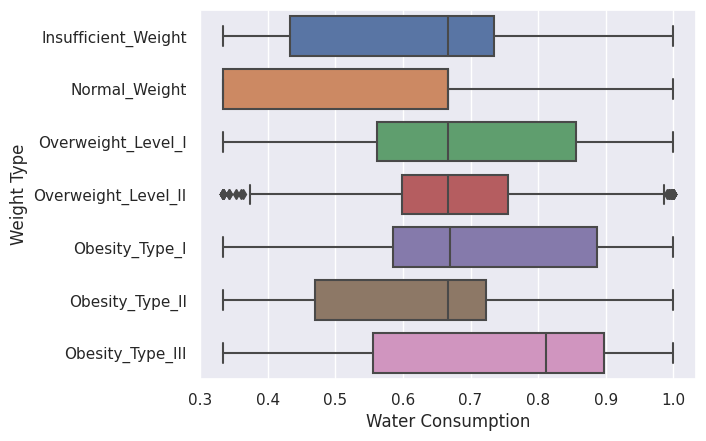

In [ ]:
weight_type_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
                     'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
sns.boxplot (x="water_consumption",y="weight_type",width = 0.75,data=data2,order=weight_type_order)

# Set the labels for x and y axes
plt.ylabel('Weight Type')
plt.xlabel('Water Consumption')

# Show the plot
plt.show()

technology_usage vs weight type :

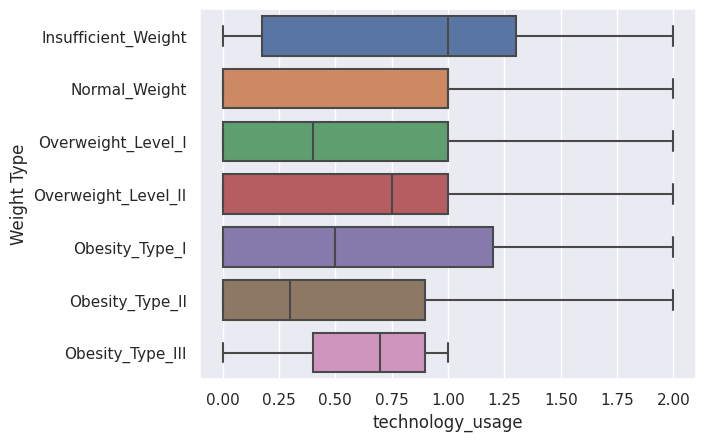

In [ ]:
sns.boxplot (x="technology_usage",y="weight_type",width = 0.75,data=data2,order=weight_type_order)

# Set the labels for x and y axes
plt.ylabel('Weight Type')
plt.xlabel('technology_usage')

# Show the plot
plt.show()

Family History with Overweight vs Weight Type :

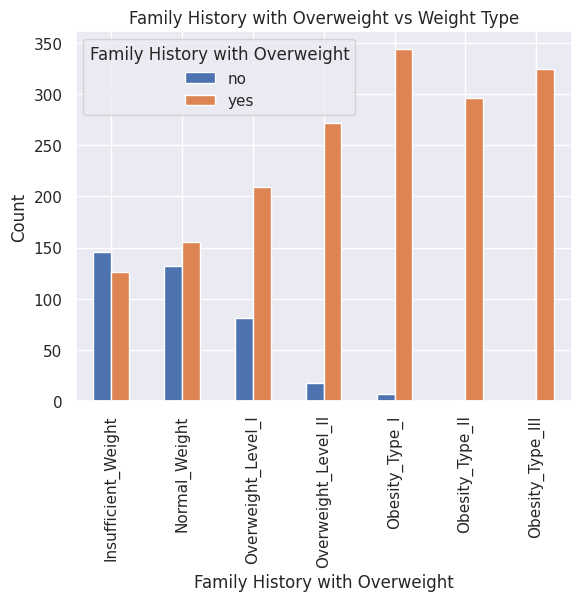

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by weight type and technology usage category and count occurrences
grouped_data = data2.groupby(['weight_type', 'family_history_with_overweight']).size().unstack()

# Reorder the rows based on weight type order
grouped_data = grouped_data.reindex(weight_type_order)
# Plot the grouped bar chart
grouped_data.plot(kind='bar')

# Set labels and title
plt.xlabel('Family History with Overweight')
plt.ylabel('Count')
plt.title('Family History with Overweight vs Weight Type')

# Show the legend
plt.legend(title='Family History with Overweight')

# Display the plot
plt.show()


Food Consumption Between Meals VS weight type :

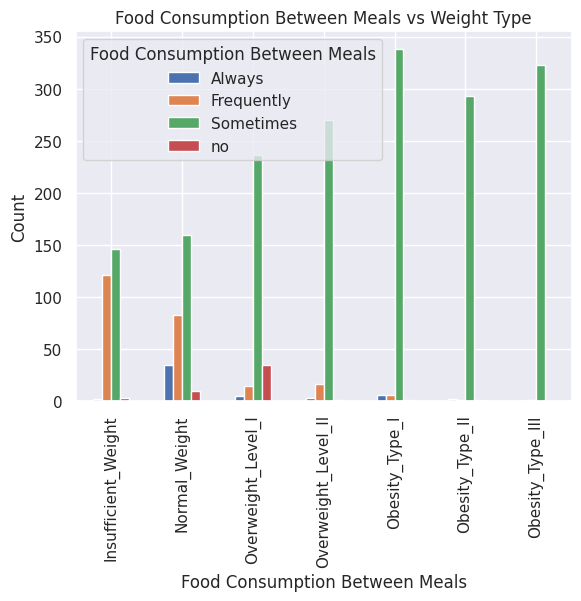

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by weight type and technology usage category and count occurrences
grouped_data = data2.groupby(['weight_type', 'take_food_between_meals']).size().unstack()

# Reorder the rows based on weight type order
grouped_data = grouped_data.reindex(weight_type_order)
# Plot the grouped bar chart
grouped_data.plot(kind='bar')

# Set labels and title
plt.xlabel('Food Consumption Between Meals')
plt.ylabel('Count')
plt.title('Food Consumption Between Meals vs Weight Type')

# Show the legend
plt.legend(title='Food Consumption Between Meals')

# Display the plot
plt.show()

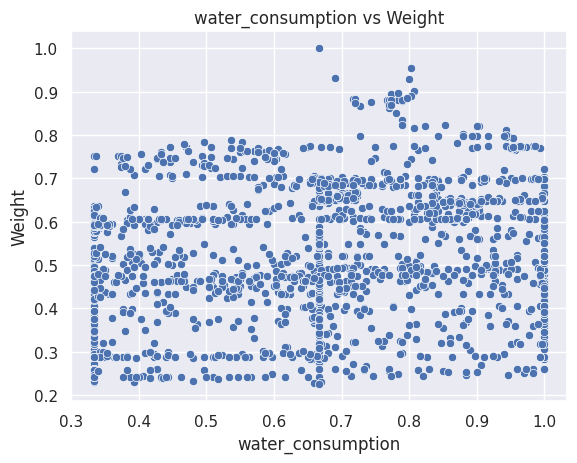

water_consumption and Weight


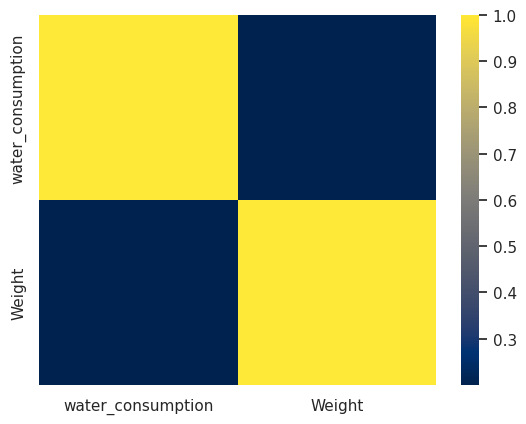

In [ ]:
#create graph (scatter plot):
plt.figure()
sns.scatterplot(x = 'water_consumption', y="Weight", data=data2)
plt.title('water_consumption vs Weight')
plt.show()
#correlation:
df_pp=data2[["water_consumption","Weight"]]#to create correlation
df_pp.corr()
sns.heatmap(df_pp.corr(),cmap = 'cividis') #to visualize
print(f"water_consumption and Weight")

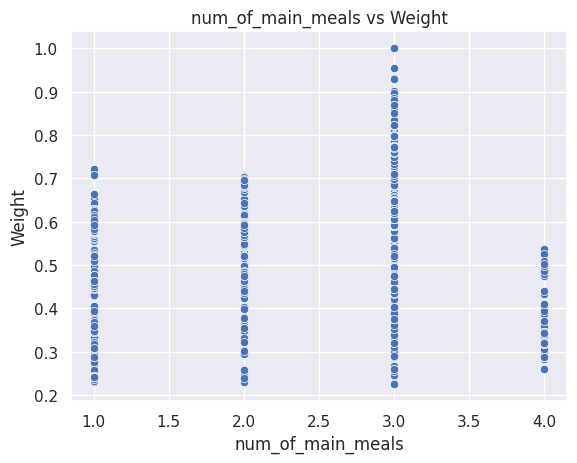

num_of_main_meals and Weight


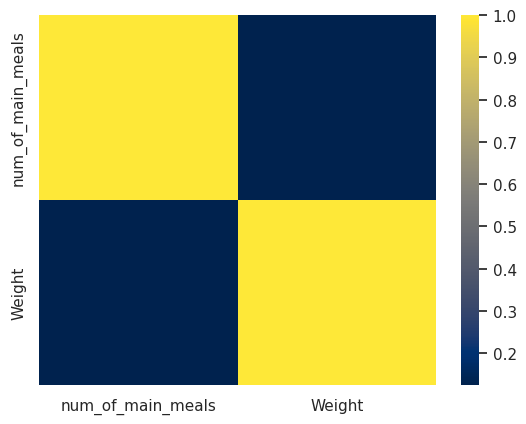

In [ ]:
#create graph (scatter plot):
plt.figure()
sns.scatterplot(x = 'num_of_main_meals', y="Weight", data=data2)
plt.title('num_of_main_meals vs Weight')
plt.show()
#correlation:
df_pp2=data2[["num_of_main_meals","Weight"]]#to create correlation
df_pp2.corr()
sns.heatmap(df_pp2.corr(),cmap = 'cividis') #to visualize
print(f"num_of_main_meals and Weight")

<Axes: xlabel='num_of_main_meals', ylabel='Weight'>

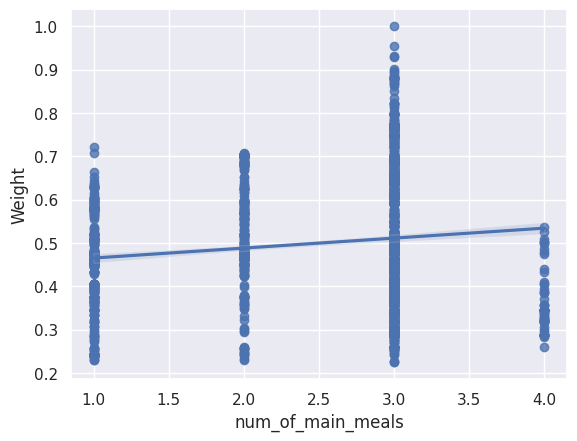

In [ ]:
sns.regplot(x='num_of_main_meals', y='Weight',data=data2)

<Axes: xlabel='water_consumption', ylabel='Weight'>

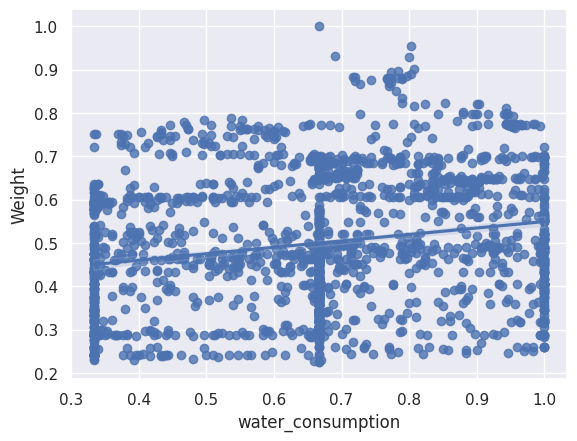

In [ ]:
sns.regplot(x='water_consumption', y='Weight',data=data2)

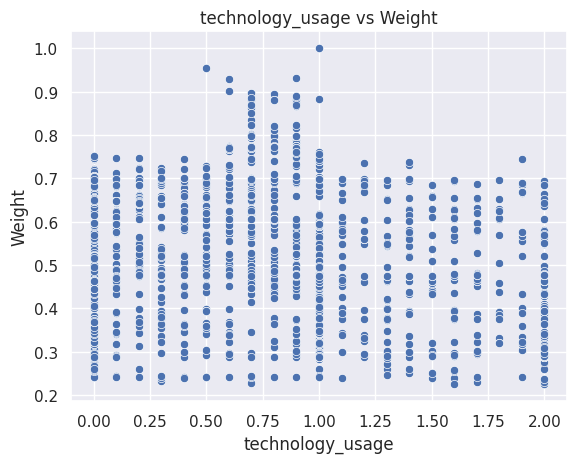

technology_usage and Weight


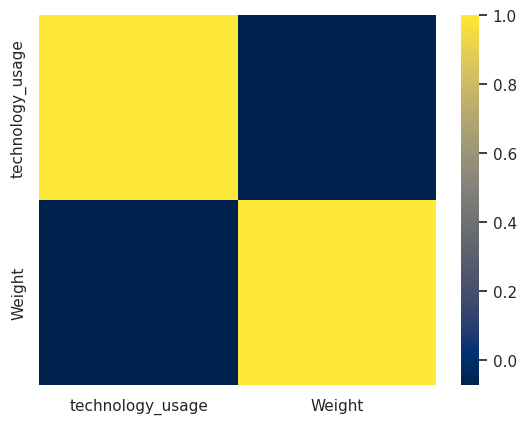

In [ ]:
#create graph (scatter plot):
plt.figure()
sns.scatterplot(x='technology_usage', y='Weight', data=data2)
plt.title('technology_usage vs Weight')
plt.show()
#correlation:
df_pp3=data2[["technology_usage","Weight"]]#to create correlation
df_pp3.corr()
sns.heatmap(df_pp3.corr(),cmap = 'cividis') #to visualize
print(f"technology_usage and Weight")


<Axes: xlabel='technology_usage', ylabel='Weight'>

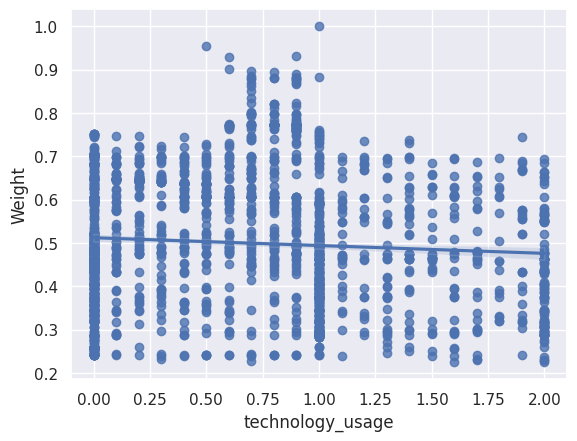

In [ ]:
sns.regplot(x='technology_usage', y='Weight',data=data2)

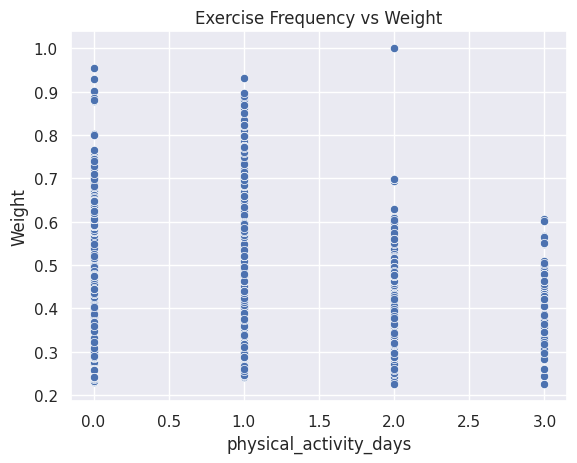

Exercise Frequency and Weight


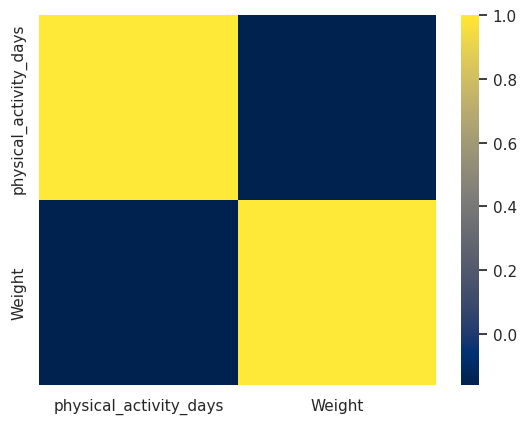

In [ ]:
#create graph (scatter plot):
plt.figure()
sns.scatterplot(x = 'physical_activity_days', y="Weight", data=data2)
plt.title('Exercise Frequency vs Weight')
plt.show()
#correlation:
df_pp=data2[["physical_activity_days","Weight"]]#to create correlation
df_pp.corr()
sns.heatmap(df_pp.corr(),cmap = 'cividis') #to visualize
print(f"Exercise Frequency and Weight")


<Axes: xlabel='physical_activity_days', ylabel='Weight'>

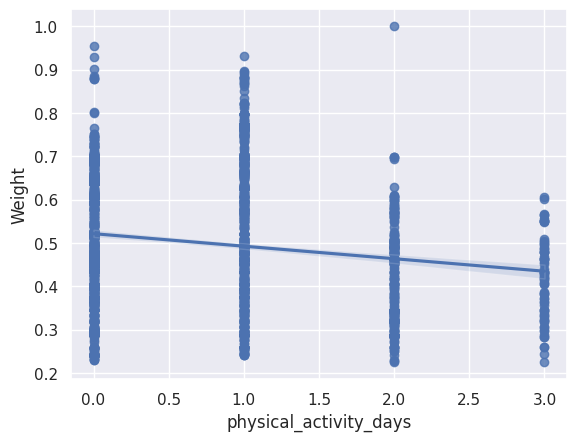

In [ ]:
sns.regplot(x='physical_activity_days', y='Weight',data=data2)

<Axes: >

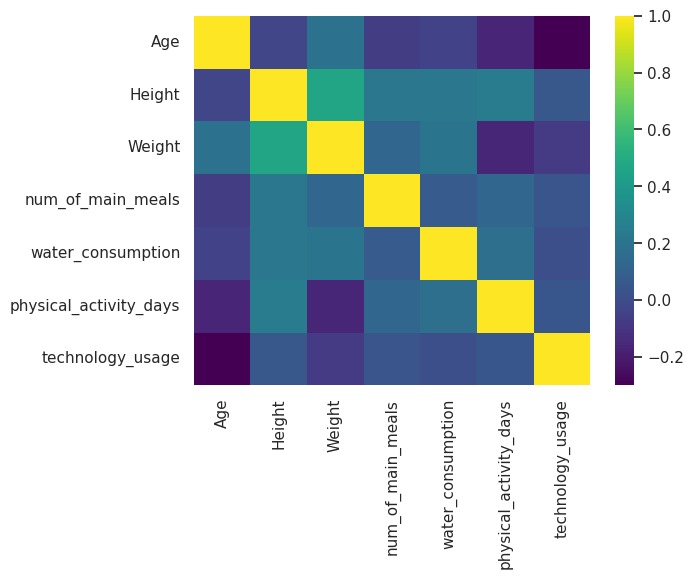

In [374]:
sns.heatmap(data2.corr(),cmap='viridis')

# Classification Algorithm

## Step 01: Building Predictive Models (Regression &Classification)

In [ ]:
data2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,take_highcaloryfood,take_vege,num_of_main_meals,take_food_between_meals,smoking,water_consumption,monitor_calory,physical_activity_days,technology_usage,take_alcohol,transport_used,weight_type,technology_usage-binned,Age-binned,water_consumption-binned
1,Female,21,0.818182,0.369942,yes,no,sometimes,3,Sometimes,no,0.666667,no,0,1.0,no,Public_Transportation,Normal_Weight,Moderate,20-30,Moderate
2,Female,21,0.767677,0.323699,yes,no,always,3,Sometimes,yes,1.000000,yes,3,0.0,Sometimes,Public_Transportation,Normal_Weight,Low,20-30,High
3,Male,23,0.909091,0.445087,yes,no,sometimes,3,Sometimes,no,0.666667,no,2,1.0,Frequently,Public_Transportation,Normal_Weight,Moderate,20-30,Moderate
4,Male,27,0.909091,0.502890,no,no,always,3,Sometimes,no,0.666667,no,2,0.0,Frequently,Walking,Overweight_Level_I,Low,20-30,Moderate
5,Male,22,0.898990,0.519075,no,no,sometimes,1,Sometimes,no,0.666667,no,0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,Low,20-30,Moderate


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 1 to 2111
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   object  
 1   Age                             2111 non-null   int64   
 2   Height                          2111 non-null   float64 
 3   Weight                          2111 non-null   float64 
 4   family_history_with_overweight  2111 non-null   object  
 5   take_highcaloryfood             2111 non-null   object  
 6   take_vege                       2111 non-null   object  
 7   num_of_main_meals               2111 non-null   int64   
 8   take_food_between_meals         2111 non-null   object  
 9   smoking                         2111 non-null   object  
 10  water_consumption               2111 non-null   float64 
 11  monitor_calory                  2111 non-null   object  
 12  physical_activity_da

## Step 02: Preparing the data for model training

In [ ]:
sample_incomplete_rows = data2[data2.isnull().any(axis=1)]     # filter out rows with null values on any column
sample_incomplete_rows

,Gender,Age,Height,Weight,family_history_with_overweight,take_highcaloryfood,take_vege,num_of_main_meals,take_food_between_meals,smoking,water_consumption,monitor_calory,physical_activity_days,technology_usage,take_alcohol,transport_used,weight_type,technology_usage-binned,Age-binned,water_consumption-binned


In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ["Gender","family_history_with_overweight", "transport_used","take_vege", "take_highcaloryfood", "smoking", "monitor_calory",
                       "take_alcohol", "weight_type", "take_food_between_meals","technology_usage-binned","Age-binned","water_consumption-binned"]

encoders = {}
encoded_data = {}

for column in categorical_columns:
    encoder = LabelEncoder()
    encoded_data[column] = encoder.fit_transform(data2[column].astype(str))
    encoders[column] = encoder

In [ ]:
encoder.classes_

array(['High', 'Low', 'Moderate'], dtype=object)

In [ ]:
data2['family_history_with_overweight'] = encoder.fit_transform(data2['family_history_with_overweight'])
data2['transport_used'] = encoder.fit_transform(data2['transport_used'])
data2['take_highcaloryfood'] = encoder.fit_transform(data2['take_highcaloryfood'])
data2['smoking'] = encoder.fit_transform(data2['smoking'])
data2['monitor_calory'] = encoder.fit_transform(data2['monitor_calory'])
data2['take_alcohol'] = encoder.fit_transform(data2['take_alcohol'])
data2['weight_type'] = encoder.fit_transform(data2['weight_type'])
data2['take_food_between_meals'] = encoder.fit_transform(data2['take_food_between_meals'])
data2['take_vege'] = encoder.fit_transform(data2['take_vege'])
data2['Gender'] = encoder.fit_transform(data2['Gender'])
data2['technology_usage-binned'] = encoder.fit_transform(data2['technology_usage-binned'])
data2['Age-binned'] = encoder.fit_transform(data2['Age-binned'])
data2['water_consumption-binned'] = encoder.fit_transform(data2['water_consumption-binned'])

In [ ]:
data2

,Gender,Age,Height,Weight,family_history_with_overweight,take_highcaloryfood,take_vege,num_of_main_meals,take_food_between_meals,smoking,water_consumption,monitor_calory,physical_activity_days,technology_usage,take_alcohol,transport_used,weight_type,technology_usage-binned,Age-binned,water_consumption-binned
1,0,21,0.818182,0.369942,1,0,2,3,2,0,0.666667,0,0,1.0,3,3,1,2,0,2
2,0,21,0.767677,0.323699,1,0,0,3,2,1,1.000000,1,3,0.0,2,3,1,1,0,0
3,1,23,0.909091,0.445087,1,0,2,3,2,0,0.666667,0,2,1.0,1,3,1,2,0,2
4,1,27,0.909091,0.502890,0,0,0,3,2,0,0.666667,0,2,0.0,1,4,5,1,0,2
5,1,22,0.898990,0.519075,0,0,2,1,2,0,0.666667,0,0,0.0,2,3,6,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,0,20,0.863636,0.759595,1,1,0,3,2,0,0.576667,0,1,0.9,2,3,4,2,3,2
2108,0,21,0.883838,0.773064,1,1,0,3,2,0,0.670000,0,1,0.6,2,3,4,1,0,2
2109,0,22,0.883838,0.772775,1,1,0,3,2,0,0.683333,0,1,0.6,2,3,4,1,0,2
2110,0,24,0.878788,0.770809,1,1,0,3,2,0,0.950000,0,1,0.6,2,3,4,1,0,0


In [ ]:
X = data2.drop("weight_type", axis=1)     # drop labels from original data
y = data2["weight_type"].copy()   # copy the labels to another dataframe/series

In [ ]:
print(X.shape)
print(y.shape)

(2111, 19)
(2111,)


In [ ]:
y

1       1
2       1
3       1
4       5
5       6
       ..
2107    4
2108    4
2109    4
2110    4
2111    4
Name: weight_type, Length: 2111, dtype: int64

## Step 03: Model Training

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# check shapes after splitting
#total rows before split 20433
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1583, 19)
(1583,)
(528, 19)
(528,)


### Logistic Regression Classification :

In [ ]:
data2['weight_type'].value_counts()

2    351
4    324
3    297
5    290
6    290
1    287
0    272
Name: weight_type, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
lr_model = LogisticRegression()

In [ ]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,take_highcaloryfood,take_vege,num_of_main_meals,take_food_between_meals,smoking,water_consumption,monitor_calory,physical_activity_days,technology_usage,take_alcohol,transport_used,technology_usage-binned,Age-binned,water_consumption-binned
1,0,21,0.818182,0.369942,1,0,2,3,2,0,0.666667,0,0,1.0,3,3,2,0,2
2,0,21,0.767677,0.323699,1,0,0,3,2,1,1.000000,1,3,0.0,2,3,1,0,0
3,1,23,0.909091,0.445087,1,0,2,3,2,0,0.666667,0,2,1.0,1,3,2,0,2
4,1,27,0.909091,0.502890,0,0,0,3,2,0,0.666667,0,2,0.0,1,4,1,0,2
5,1,22,0.898990,0.519075,0,0,2,1,2,0,0.666667,0,0,0.0,2,3,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,0,20,0.863636,0.759595,1,1,0,3,2,0,0.576667,0,1,0.9,2,3,2,3,2
2108,0,21,0.883838,0.773064,1,1,0,3,2,0,0.670000,0,1,0.6,2,3,1,0,2
2109,0,22,0.883838,0.772775,1,1,0,3,2,0,0.683333,0,1,0.6,2,3,1,0,2
2110,0,24,0.878788,0.770809,1,1,0,3,2,0,0.950000,0,1,0.6,2,3,1,0,0


In [ ]:
cv_model = cross_validate(lr_model, X, y, cv=3, return_estimator=True, return_train_score=True, verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s finished


In [ ]:
cv_model

{'fit_time': array([0.35505939, 0.29979181, 0.3487134 ]),
 'score_time': array([0.00927043, 0.00952196, 0.01411271]),
 'estimator': [LogisticRegression(),
  LogisticRegression(),
  LogisticRegression()],
 'test_score': array([0.50426136, 0.60511364, 0.6002845 ]),
 'train_score': array([0.64179104, 0.59132907, 0.60298295])}

In [ ]:
print(cv_model['train_score'])
print(cv_model['train_score'].mean())
print(cv_model['test_score'])
print(cv_model['test_score'].mean())

[0.64179104 0.59132907 0.60298295]
0.6120343560875278
[0.50426136 0.60511364 0.6002845 ]
0.5698864983404457


The train and test scores represent the performance of the classification model.

Train score: The train score indicates how well the model performs on the training data. It is the accuracy of the model's predictions when evaluated on the same data it was trained on. In your case, the train scores are [0.64179104, 0.59132907, 0.60298295], which means the model achieved an accuracy of approximately 64.2%, 59.1%, and 60.3% on the respective training folds.

Mean train score: The mean train score is the average of the train scores across all folds. In your case, the mean train score is 0.6120343560875278, indicating an average accuracy of approximately 61.2% on the training data.

Test score: The test score represents the model's performance on unseen data, which is the test data. It is the accuracy of the model's predictions when evaluated on data that it hasn't seen during training. In your case, the test scores are [0.50426136, 0.60511364, 0.6002845], indicating that the model achieved an accuracy of approximately 50.4%, 60.5%, and 60.0% on the respective test folds.

Mean test score: The mean test score is the average of the test scores across all folds. In your case, the mean test score is 0.5698864983404457, indicating an average accuracy of approximately 56.9% on the test data.

These scores give you an idea of how well the classification model is performing. Higher scores indicate better performance, while lower scores indicate poorer performance. It's important to evaluate both the train and test scores to assess if the model is overfitting (high train score but low test score) or underfitting (low train score and low test score).

In [ ]:
cv_model['estimator'][2]

LogisticRegression()

In [ ]:
cv_model['estimator'][0]

LogisticRegression()

Now this model can now be deployed to classify future data that will be collected.

## Step 04: "Pickle it" process

In [ ]:
import pickle

best_model = cv_model['estimator'][2]

with open('model.pkl', 'wb') as file: #write binary file
    pickle.dump(best_model, file)

In [ ]:
!dir

decision_tree	   ObesityDataSet_raw_and_data_sinthetic_CLEANED.csv
decision_tree.pdf  ObesityDataSet_raw_and_data_sinthetic.csv
model.pkl	   sample_data


In [ ]:
del best_model

When you need to load the model:

In [ ]:
with open('model.pkl', 'rb') as file: #read binary file
    loaded_model = pickle.load(file, encoding='bytes')

In [ ]:
loaded_model.coef_

array([[-6.66174763e-01, -3.69296560e-02,  5.33803565e-01,
        -1.87178960e+00, -2.11486376e+00, -2.34671814e-02,
         6.30473067e-01,  3.45150026e-01, -1.03421413e+00,
        -2.88147607e-01,  1.67793116e-01, -2.77737352e-01,
         4.52892034e-01,  4.07885648e-01,  1.28165915e+00,
        -7.63069757e-02, -2.54250131e-01,  3.43871045e-01,
         1.28389142e-01],
       [-4.22938750e-02,  1.03775026e-02, -4.50442374e-04,
        -1.39969310e+00, -1.12094106e+00, -4.53236993e-01,
         4.43822592e-01,  1.68283479e-01, -8.00945051e-01,
         5.04531660e-01,  1.82974162e-01,  5.04901427e-01,
         8.34186146e-01,  1.68456886e-01,  5.35482708e-01,
         1.38918963e-01,  1.89780020e-01, -4.27861952e-02,
         5.05500046e-01],
       [-1.92245323e-01,  4.21774816e-02, -2.55416720e-01,
         9.30870163e-01,  1.30417887e+00,  7.48552628e-01,
         9.44869255e-01, -6.82832720e-01, -4.03306492e-02,
         1.98652850e-02,  2.59396961e-01, -3.99754806e-01,
    

### Decision Tree Classifier:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create an instance of DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Train the model on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
dt_predictions = dt_classifier.predict(X_test)

# Calculate the accuracy of the model
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Print the accuracy score
print("Accuracy:", dt_accuracy)


Accuracy: 0.9488636363636364


# Algorithm Comparison:

Confusion matrix for the logistic regression model:

0.571969696969697


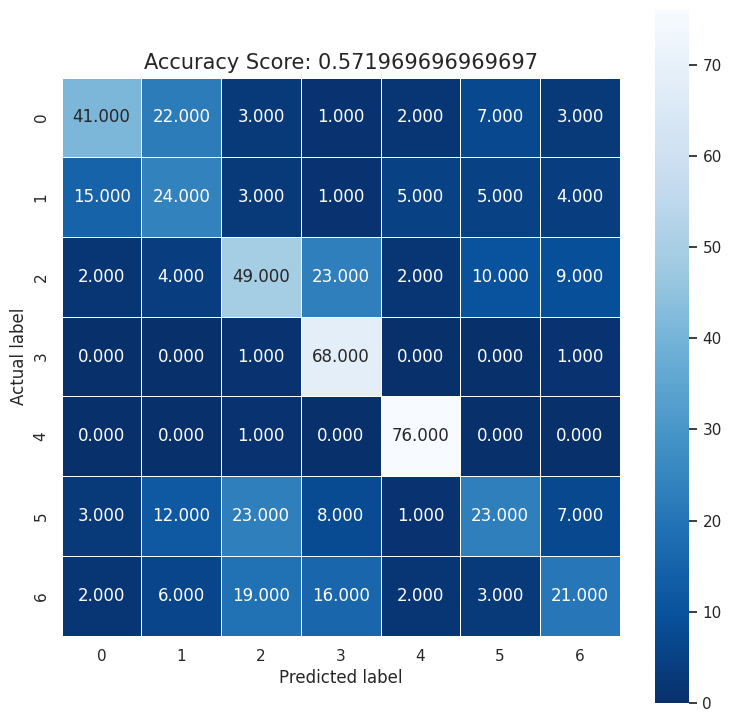

In [ ]:
data2['weight_type'].unique()

data2['weight_type'] = data2['weight_type'].replace([1, 5, 6, 2, 0, 3, 4],0)
data2

lr1_model = LogisticRegression()
lr1_model = lr1_model.fit(X_train, y_train)
predictions = lr1_model.predict(X_test)
score = lr1_model.score(X_test, y_test)
print(score)


from sklearn.metrics import confusion_matrix
z = confusion_matrix(y_test, predictions)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
#sns.heatmap(z, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues')
sns.heatmap(z, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


Confusion matrix for decision tree:

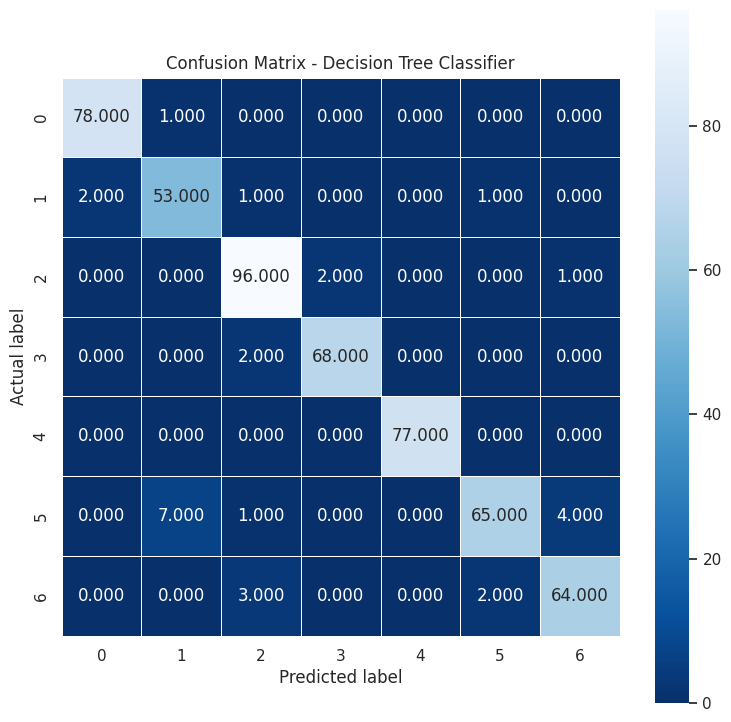

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
dt_cm = confusion_matrix(y_test, dt_predictions)

# Plot the confusion matrix
plt.figure(figsize=(9, 9))
sns.heatmap(dt_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()


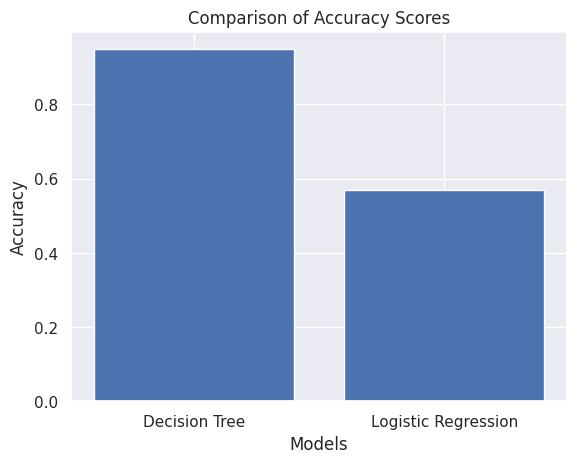

In [ ]:
import matplotlib.pyplot as plt

models = ['Decision Tree', 'Logistic Regression']
accuracy_scores = [dt_accuracy, cv_model['test_score'].mean()]

plt.bar(models, accuracy_scores)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Scores')
plt.show()
